# Assignment 2

*Dency Claris Thomas*

*Dataset 6*

(a) What is the degree distribution of the network? Please plot the distribution and attach it to
your answer sheet.

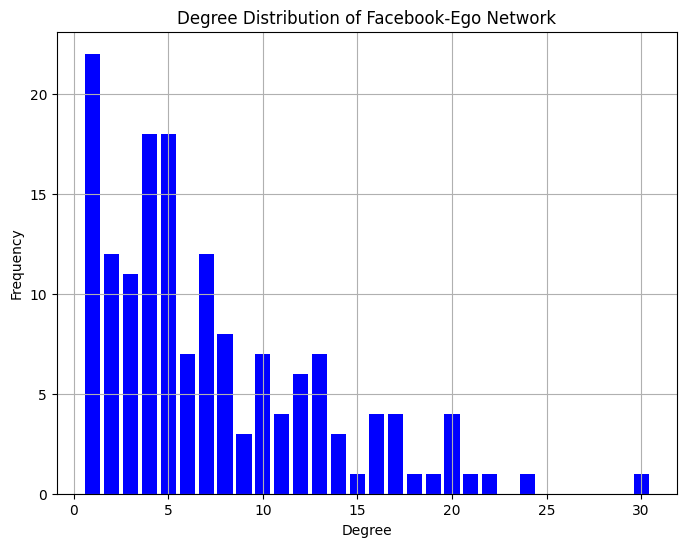

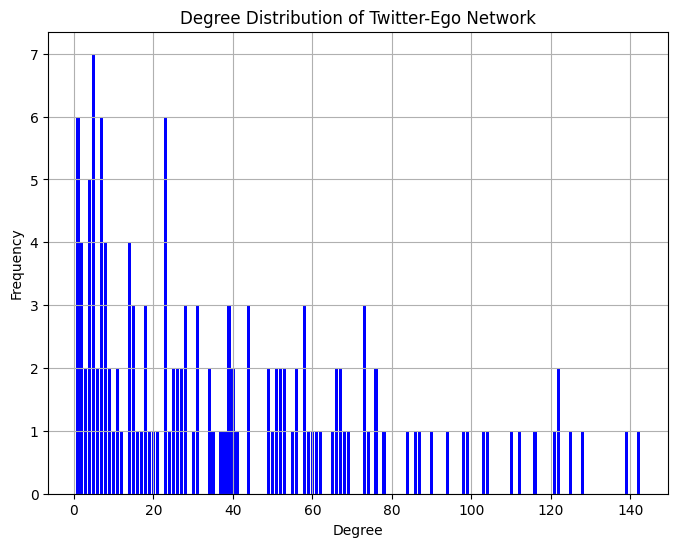

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Load Facebook-Ego Network
facebook_edges_file = 'datasets/1684.edges'
facebook_ego_graph = nx.read_edgelist(facebook_edges_file)

# Load Twitter-Ego Network
twitter_edges_file = 'datasets/2029971.edges'
twitter_ego_graph = nx.read_edgelist(twitter_edges_file, create_using=nx.DiGraph())

# Function to plot degree distribution
def plot_degree_distribution(graph, title):
    degrees = [degree for node, degree in graph.degree()]
    
    # Count how many nodes have each degree
    degree_counts = Counter(degrees)
    
    # Separate the degree values and their corresponding counts
    degree_values, degree_frequencies = zip(*degree_counts.items())
    
    # Plotting the degree distribution
    plt.figure(figsize=(8, 6))
    plt.bar(degree_values, degree_frequencies, width=0.80, color='b')
    plt.title(f"Degree Distribution of {title}")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Plot degree distribution for Facebook-Ego
plot_degree_distribution(facebook_ego_graph, "Facebook-Ego Network")

# Plot degree distribution for Twitter-Ego
plot_degree_distribution(twitter_ego_graph, "Twitter-Ego Network")


(b) According to the degree distribution, what is the main difference between the chosen network
and a random network with the same number of nodes? What may cause the difference?


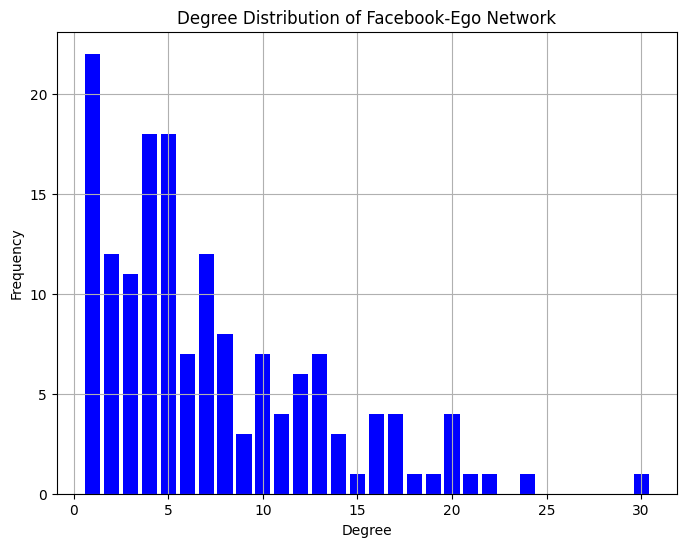

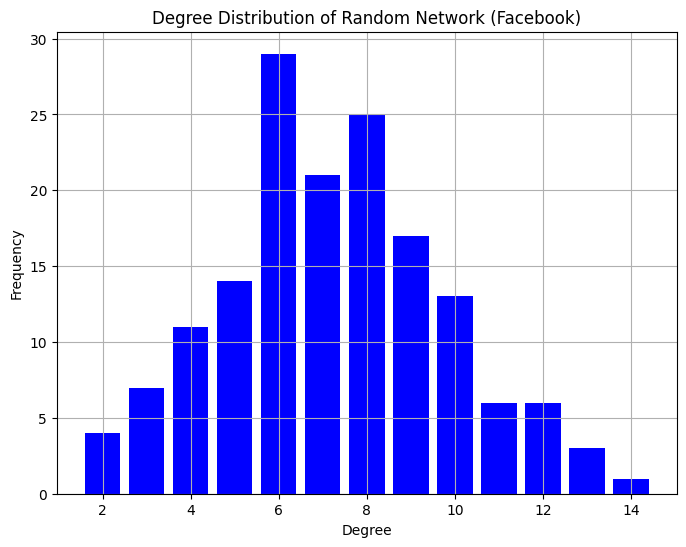

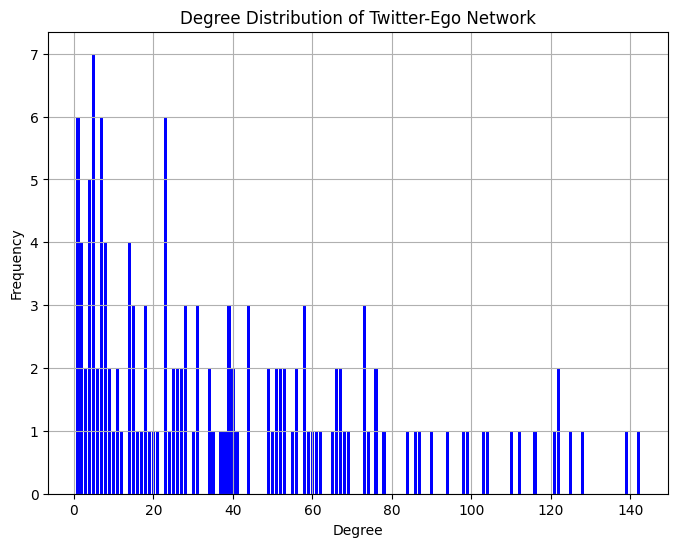

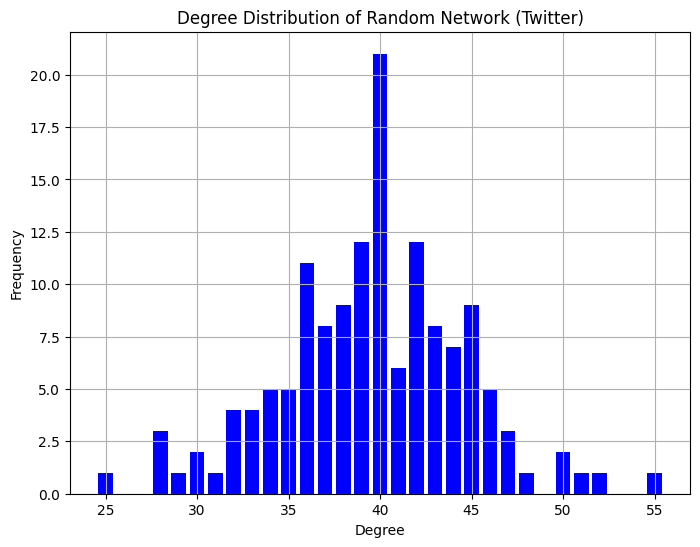

In [26]:
# Function to plot degree distribution
def plot_degree_distribution(graph, title):
    degrees = [degree for node, degree in graph.degree()]
    degree_counts = Counter(degrees)
    degree_values, degree_frequencies = zip(*degree_counts.items())

    # Plot the degree distribution
    plt.figure(figsize=(8, 6))
    plt.bar(degree_values, degree_frequencies, width=0.80, color='b')
    plt.title(f"Degree Distribution of {title}")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Generate random network with the same number of nodes and edges
def generate_random_network(graph):
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    random_graph = nx.gnm_random_graph(num_nodes, num_edges)
    return random_graph

# Plot degree distribution for Facebook-Ego
plot_degree_distribution(facebook_ego_graph, "Facebook-Ego Network")

# Generate and plot random network with same number of nodes and edges as Facebook-Ego
facebook_random_graph = generate_random_network(facebook_ego_graph)
plot_degree_distribution(facebook_random_graph, "Random Network (Facebook)")

# Plot degree distribution for Twitter-Ego
plot_degree_distribution(twitter_ego_graph, "Twitter-Ego Network")

# Generate and plot random network with same number of nodes and edges as Twitter-Ego
twitter_random_graph = generate_random_network(twitter_ego_graph)
plot_degree_distribution(twitter_random_graph, "Random Network (Twitter)")


#### Differences Between Chosen Networks and Random Networks:
*Random Network:*
* Follows a Poisson distribution.
* Most nodes have a degree close to the average, with few very high-degree nodes.

*Chosen Social Networks (Facebook/Twitter):*
* Follows a power-law distribution (a long tail distribution)
* A few highly connected nodes (hubs or influencers) and many nodes with few connections.

#### Possible Causes of the Difference:
*Social Networks:*
* In social networks, certain individuals are highly influential and attract many connections, while others remain less connected.
* People form clusters or groups of friends, leading to a few nodes having significantly more connections.

*Random Networks:*
* No preferential attachment—edges are placed randomly.
* This results in most nodes having approximately the same number of connections, and fewer nodes having significantly more connections.

(c) What is the average path length of the network?

In [16]:
# Function to calculate and print the average path length
def compute_average_path_length(graph, graph_name, directed=False):
    # For directed graphs (Twitter-Ego), use weakly connected check
    if directed:
        if nx.is_weakly_connected(graph):
            largest_component = max(nx.weakly_connected_components(graph), key=len)
            subgraph = graph.subgraph(largest_component).to_undirected()  # Convert to undirected for path length computation
            avg_path_length = nx.average_shortest_path_length(subgraph)
            print(f"The average path length of the largest weakly connected component of the {graph_name} is: {avg_path_length}")
        else:
            print(f"The {graph_name} is disconnected and has no weakly connected component.")
    else:
        # Check if the graph is connected (for undirected graphs like Facebook-Ego)
        if nx.is_connected(graph):
            avg_path_length = nx.average_shortest_path_length(graph)
            print(f"The average path length of the {graph_name} is: {avg_path_length}")
        else:
            # Calculate the average path length for the largest connected component
            components = list(nx.connected_components(graph))
            largest_component = max(components, key=len)
            subgraph = graph.subgraph(largest_component)
            avg_path_length = nx.average_shortest_path_length(subgraph)
            print(f"The graph is disconnected. The average path length for the largest connected component of the {graph_name}: {avg_path_length}")

# Calculate average path length for Facebook-Ego Network (undirected)
compute_average_path_length(facebook_ego_graph, "Facebook-Ego Network")

# Calculate average path length for Twitter-Ego Network (directed)
compute_average_path_length(twitter_ego_graph, "Twitter-Ego Network", directed=True)


The graph is disconnected. The average path length for the largest connected component of the Facebook-Ego Network: 4.097008666480291
The average path length of the largest weakly connected component of the Twitter-Ego Network is: 2.285432876982173


(d) Please randomly choose 5 nodes from the network, and calculate the clustering coefficients of
these nodes, respectively

In [19]:
import random

# Function to compute clustering coefficients for randomly selected nodes
def compute_clustering_coefficients(graph, graph_name, num_nodes=5):
    # Randomly select 5 nodes
    node_list = list(graph.nodes())
    selected_nodes = random.sample(node_list, num_nodes)
    
    # Calculate and print clustering coefficients for each selected node
    print(f"Clustering Coefficients for {graph_name}:")
    for node in selected_nodes:
        clustering_coeff = nx.clustering(graph, node)
        print(f"Node {node}: Clustering Coefficient = {clustering_coeff}")
    print() 


# For Twitter-Ego, we'll convert it to an undirected graph for clustering coefficient calculation
twitter_ego_undirected = twitter_ego_graph.to_undirected()

# Calculate clustering coefficients for 5 random nodes from Facebook-Ego Network
compute_clustering_coefficients(facebook_ego_graph, "Facebook-Ego Network")

# Calculate clustering coefficients for 5 random nodes from Twitter-Ego Network (directed and undirected)
compute_clustering_coefficients(twitter_ego_graph, "Twitter-Ego Network (directed)")
compute_clustering_coefficients(twitter_ego_undirected, "Twitter-Ego Network (undirected)")


Clustering Coefficients for Facebook-Ego Network:
Node 2666: Clustering Coefficient = 0.5454545454545454
Node 2676: Clustering Coefficient = 0.5916666666666667
Node 2800: Clustering Coefficient = 0.6432748538011696
Node 2704: Clustering Coefficient = 0
Node 2668: Clustering Coefficient = 0.2

Clustering Coefficients for Twitter-Ego Network (directed):
Node 16438279: Clustering Coefficient = 0.6482444733420026
Node 2137251: Clustering Coefficient = 0
Node 58407373: Clustering Coefficient = 1.0
Node 15901309: Clustering Coefficient = 0.786144578313253
Node 15367053: Clustering Coefficient = 0.41807713651498335

Clustering Coefficients for Twitter-Ego Network (undirected):
Node 16337410: Clustering Coefficient = 0.5977443609022557
Node 16436311: Clustering Coefficient = 0.5333333333333333
Node 16337119: Clustering Coefficient = 0.543859649122807
Node 54743: Clustering Coefficient = 0.43873517786561267
Node 29693074: Clustering Coefficient = 0.7692307692307693



(e) What is the average clustering coefficient?

In [20]:
# Function to compute the average clustering coefficient
def compute_average_clustering_coefficient(graph, graph_name):
    avg_clustering = nx.average_clustering(graph)
    print(f"The average clustering coefficient of the {graph_name} is: {avg_clustering}")

# Calculate average clustering coefficient for Facebook-Ego Network
compute_average_clustering_coefficient(facebook_ego_graph, "Facebook-Ego Network")

# Calculate average clustering coefficient for Twitter-Ego Network (Directed and Undirected)
compute_average_clustering_coefficient(twitter_ego_graph, "Twitter-Ego Network (Directed)")
compute_average_clustering_coefficient(twitter_ego_undirected, "Twitter-Ego Network (Undirected)")


The average clustering coefficient of the Facebook-Ego Network is: 0.39469415134853486
The average clustering coefficient of the Twitter-Ego Network (Directed) is: 0.4958906617416105
The average clustering coefficient of the Twitter-Ego Network (Undirected) is: 0.5558321649127087


(f) Please list the nodes which compose the largest component in the network

In [25]:
# Function to find and print nodes in the largest component of a graph
def find_largest_component(graph, graph_name, directed=False):
    if directed:
        # For directed graphs, find the largest weakly connected component
        largest_component = max(nx.weakly_connected_components(graph), key=len)
        print(f"The largest weakly connected component of the {graph_name} contains {len(largest_component)} nodes.")
    else:
        # For undirected graphs, find the largest connected component
        largest_component = max(nx.connected_components(graph), key=len)
        print(f"The largest connected component of the {graph_name} contains {len(largest_component)} nodes.")
    
    print(f"Nodes in the largest component of the {graph_name}: {list(largest_component)}\n")

# Find and print the largest component for Facebook-Ego Network
find_largest_component(facebook_ego_graph, "Facebook-Ego Network")

# Find and print the largest component for Twitter-Ego Network (Directed)
find_largest_component(twitter_ego_graph, "Twitter-Ego Network", directed=True)


The largest connected component of the Facebook-Ego Network contains 147 nodes.
Nodes in the largest component of the Facebook-Ego Network: ['2744', '2664', '2675', '2700', '2690', '2708', '2762', '2673', '2729', '2746', '2680', '2684', '2789', '2782', '2711', '2705', '2780', '2702', '2686', '2724', '2765', '2689', '2764', '2747', '2726', '2785', '2757', '2713', '2662', '1419', '2760', '2772', '2698', '2750', '2669', '2733', '2759', '2685', '2742', '2740', '2663', '1450', '1758', '2793', '2674', '2739', '2766', '2704', '2802', '2797', '2681', '2761', '2756', '2679', '2758', '2753', '2787', '2666', '2692', '2735', '2668', '171', '2752', '2731', '2775', '2730', '1726', '2801', '1642', '1656', '2743', '2710', '2706', '2697', '2805', '2683', '2728', '2672', '2794', '2745', '2778', '2712', '2751', '2781', '2687', '2727', '2779', '2806', '1666', '2716', '2784', '2786', '2769', '2693', '2777', '2770', '2676', '58', '2714', '2717', '1171', '2737', '2803', '2723', '2694', '2749', '1405', '2738'